#                  House Rent Prediction
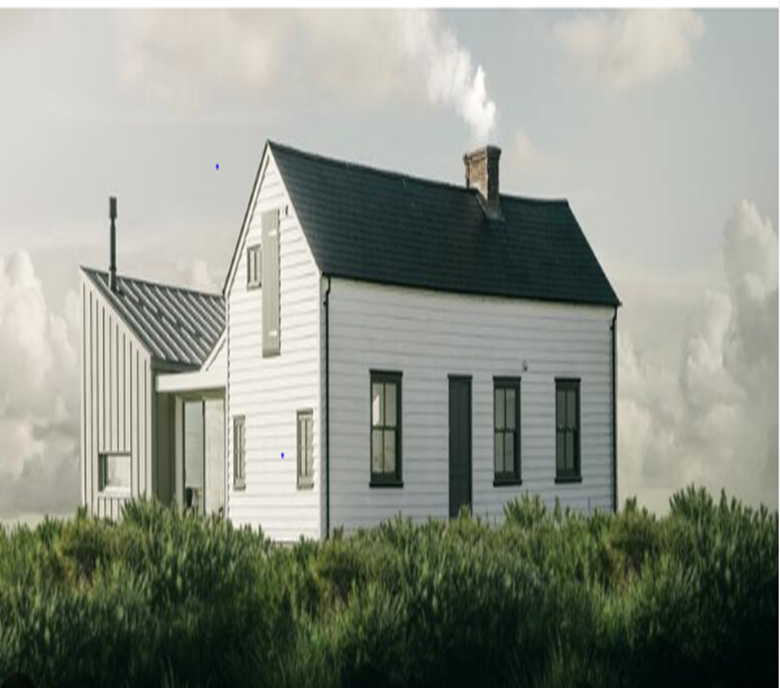

- In this Dataset, we have information on almost 4700+ Houses/Apartments/Flats Available for Rent with different parameters like BHK, Rent, Size, No. of Floors, Area Type, Area Locality, City, Furnishing Status, Type of Tenant Preferred, No. of Bathrooms, Point of Contact.
- Predict the house price 
- Experiment with various Classification Models & see which yields greatest accuracy.
- Examine trends & correlations within our data
- Determine which features are most important 

Dataset : Kaggle

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [2]:
df = pd.read_csv("house_rent.csv")
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


### Data Understanding & Removing Outlier

### This gives the no. of rows and columns present in a dataset

In [3]:
df.shape

(4746, 12)

### head()  will display the top 5 observations of the dataset

In [4]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


### info() helps to understand the data type and information about data, including the number of records in each column, data having null or not null

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


### It describes the type of data present in a dataset

In [6]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

### It gives all the column names present in the dataset

In [7]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

### tail() will display the last 5 observations of the dataset

In [8]:
df.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


### It gives the statistical  summary of data belonging to numerical datatype such as int, float etc

In [9]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


### Missing values Calculation
- isnull() is widely been in all pre-processing steps to identify null values in the data

In [10]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

- The nunique() method returns the number of unique values for each column. 

In [11]:
df.nunique()

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64

### Check for duplication
- describe which rows in the DataFrame are duplicated and not

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4741    False
4742    False
4743    False
4744    False
4745    False
Length: 4746, dtype: bool

In [13]:
df.duplicated().sum()

0

### Dropping duplicates

In [14]:
# Remove the unnecessary columns
df = df.drop(['Posted On', 'Point of Contact'], axis = 'columns')

### Univariate Analysis
- Univariate analysis is the technique of comparing and analyzing the dependency of a single predictor and a response variable. 

In [15]:
# grouping data according to categories,group the rows by column and use count() method to get the count for each group by ignoring None and Nan values.
df.groupby('Area Type')['Area Type'].agg('count')   

Area Type
Built Area        2
Carpet Area    2298
Super Area     2446
Name: Area Type, dtype: int64

In [16]:
df.drop(df.index[df['Area Type'] == 'Built Area'], inplace = True)   

In [17]:
df.groupby('Area Type')['Area Type'].agg('count')

Area Type
Carpet Area    2298
Super Area     2446
Name: Area Type, dtype: int64

In [18]:
df.groupby('City')['City'].agg('count')

City
Bangalore    886
Chennai      890
Delhi        605
Hyderabad    867
Kolkata      524
Mumbai       972
Name: City, dtype: int64

In [19]:
df.groupby('Furnishing Status')['Furnishing Status'].agg('count')

Furnishing Status
Furnished          679
Semi-Furnished    2251
Unfurnished       1814
Name: Furnishing Status, dtype: int64

In [20]:
df.groupby('Tenant Preferred')['Tenant Preferred'].agg('count')

Tenant Preferred
Bachelors            830
Bachelors/Family    3442
Family               472
Name: Tenant Preferred, dtype: int64

In [21]:
df.groupby('Floor')['Floor'].agg('count')

Floor
1                             2
1 out of 1                  134
1 out of 10                   4
1 out of 11                   1
1 out of 12                   2
                           ... 
Upper Basement out of 4       3
Upper Basement out of 40      1
Upper Basement out of 5       1
Upper Basement out of 7       2
Upper Basement out of 9       2
Name: Floor, Length: 480, dtype: int64

In [22]:
df.groupby('Area Locality')['Area Locality'].agg('count')

Area Locality
 Beeramguda, Ramachandra Puram, NH 9     1
 in Boduppal, NH 2 2                     1
 in Erragadda, NH 9                      1
 in Miyapur, NH 9                        1
117 Residency, Chembur East              1
                                        ..
vanamali chs ghatla, Ghatla              1
venkatapuram                             1
venkatesa perumal nagar                  1
villvam towers tnhb colony               1
whitefield                              12
Name: Area Locality, Length: 2234, dtype: int64

In [23]:
df = df.drop(['Floor', 'Area Locality'], axis = 'columns') 

In [24]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1


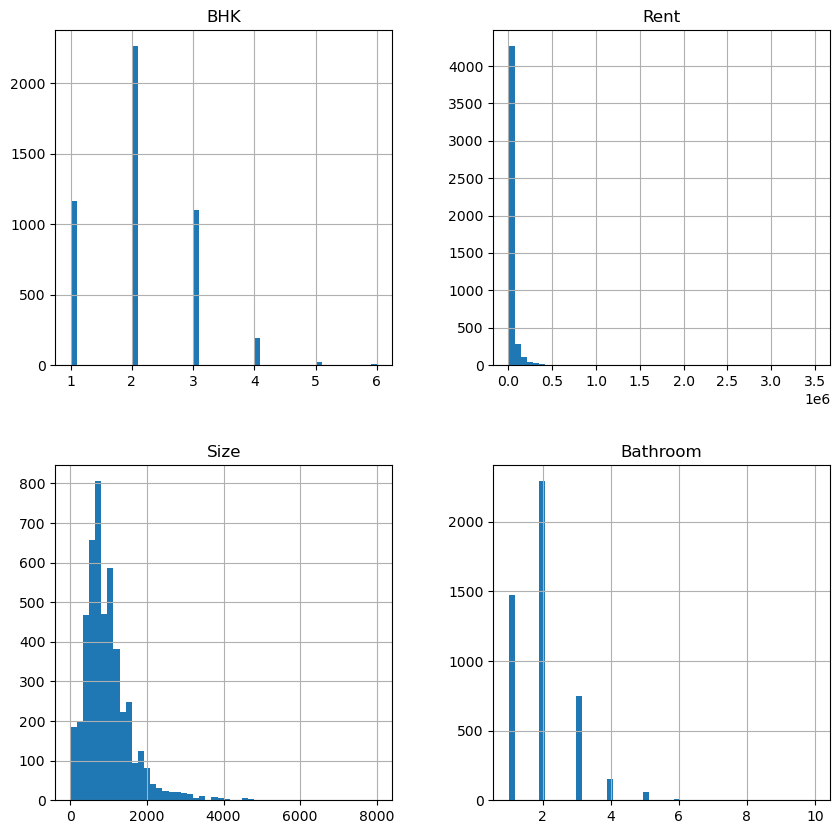

In [25]:
# A histogram is a representation of the distribution of data. 
df.hist(bins=50, figsize=(10,10))
plt.ticklabel_format(useOffset=False, style='plain')  # to prevent scientific notation.
plt.show()

In [26]:
df.Rent.describe().apply(lambda x: format(x, 'f')) # Suppress Scientific Notation When Using describe() with One Column

count       4744.000000
mean       35003.777403
std        78121.204493
min         1200.000000
25%        10000.000000
50%        16000.000000
75%        33000.000000
max      3500000.000000
Name: Rent, dtype: object

### Multivariate Analysis
- Multivariate is a controlled or supervised Machine Learning algorithm that analyses multiple data variables.
- The output is predicted based on the number of independent variables. 

In [27]:
df['Price_per_sqft'] = df['Rent']*1000/df['Size']

In [28]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,9090.909091
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,25000.000000
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,17000.000000
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,12500.000000
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,8823.529412


In [29]:
df[(df.Size/df.BHK) < 300].head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
7,1,5000,250,Super Area,Kolkata,Unfurnished,Bachelors,1,20000.000000
12,1,6500,250,Carpet Area,Kolkata,Furnished,Bachelors,1,26000.000000
21,2,9000,400,Carpet Area,Kolkata,Unfurnished,Bachelors,2,22500.000000
32,2,6000,550,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,10909.090909
33,2,5000,500,Carpet Area,Kolkata,Unfurnished,Bachelors/Family,2,10000.000000


In [30]:
df.shape

(4744, 9)

In [31]:
df1 = df[~(df.Size/df.BHK < 300)]
df1.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,9090.909091
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,25000.000000
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,17000.000000
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,12500.000000
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,8823.529412


In [32]:
df1.Price_per_sqft.describe().apply(lambda x: format(x, 'f'))

count       4196.000000
mean       32827.385605
std        41300.048982
min          571.428571
25%        13000.000000
50%        18511.595708
75%        34896.788991
max      1400000.000000
Name: Price_per_sqft, dtype: object

In [33]:
#  data points that are significantly different from the rest of the dataset. 
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('City'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df2 = remove_pps_outliers(df1)
df2.shape

(3699, 9)

In [34]:
df2[df2.Bathroom > df2.BHK + 2]

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
860,3,20000,1700,Carpet Area,Chennai,Furnished,Bachelors/Family,6,11764.705882
1904,4,150000,4000,Carpet Area,Delhi,Semi-Furnished,Bachelors,7,37500.000000
3328,1,40000,680,Super Area,Mumbai,Furnished,Bachelors/Family,4,58823.529412


In [35]:
df2 = df2[~(df2.Bathroom > df2.BHK + 2)]
df2.head()   

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
0,3,70000,3354,Carpet Area,Bangalore,Furnished,Bachelors/Family,3,20870.602266
1,2,10500,800,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2,13125.000000
2,2,13000,1000,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2,13000.000000
3,2,17000,1040,Super Area,Bangalore,Furnished,Bachelors/Family,2,16346.153846
4,3,21000,1403,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,3,14967.925873


In [36]:
df2.shape

(3696, 9)

In [37]:
df3 = df2.drop(['Price_per_sqft'], axis = 'columns')

### Correlation
- A heat map represents these coefficients to visualize the strength of correlation among variables.
- Display a color-coded correlation matrix for easy visualization of the relationship between the features in the data.

Text(0.5, 1.0, 'Correlation Matrix ')

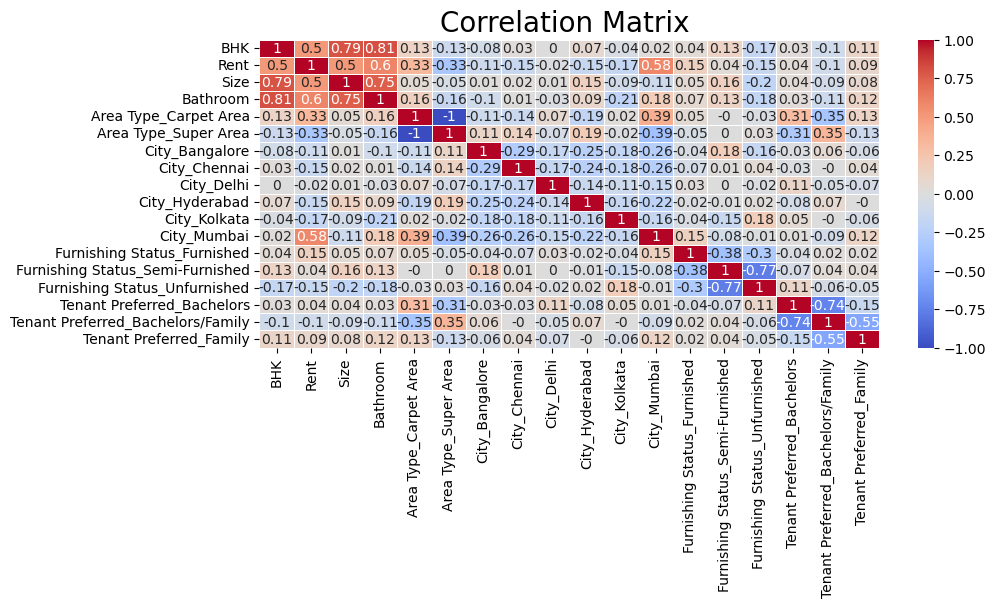

In [143]:
plt.figure(figsize=(10, 4))
correlation_matrix = df3.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix ", size=20)

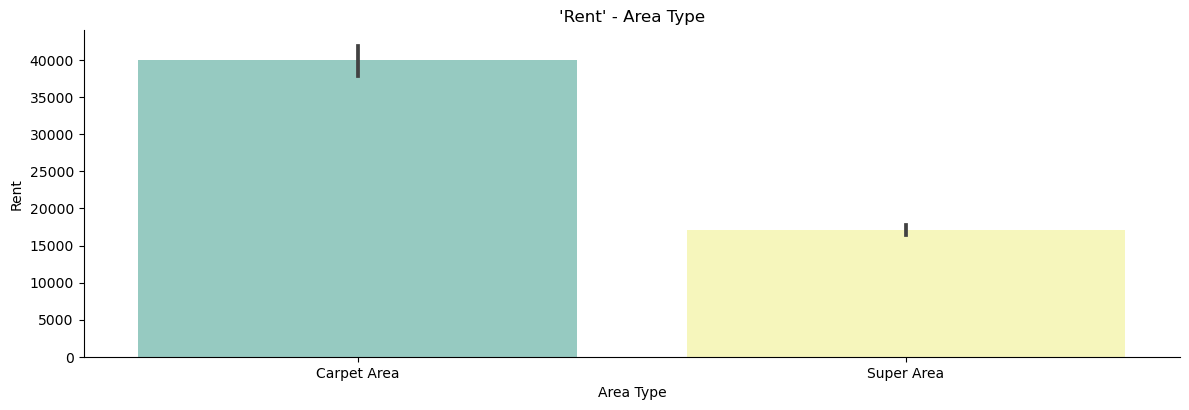

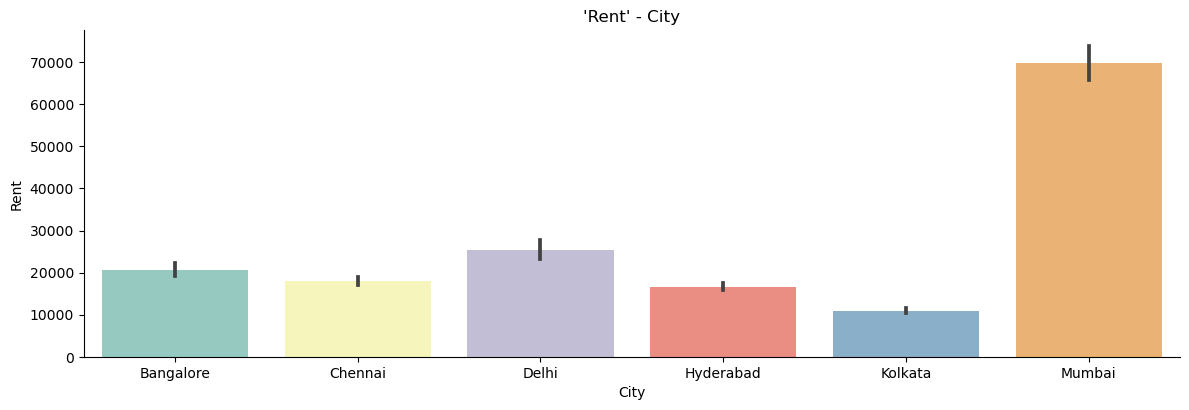

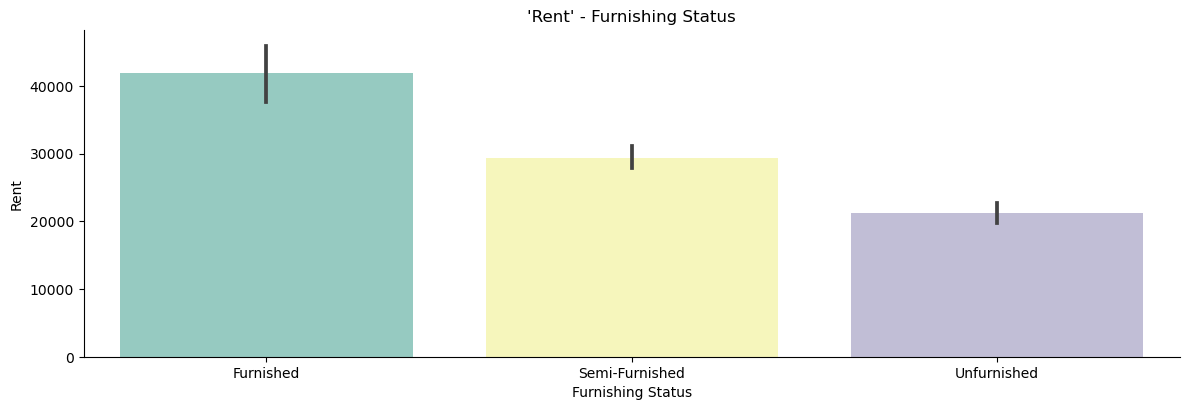

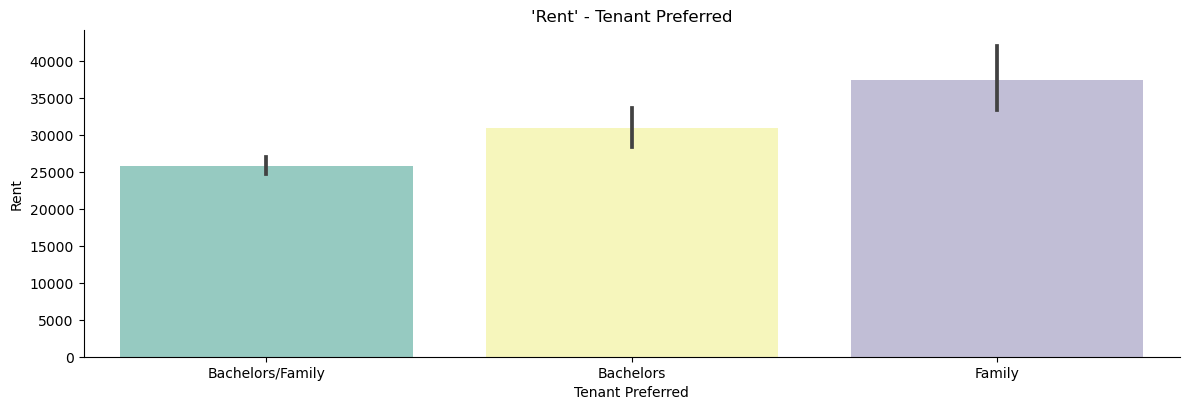

In [39]:
# The Seaborn.catplot() method is used to plot categorical plots.
cat_features = df2.select_dtypes(include='object').columns.to_list()
for col in cat_features:
  sns.catplot(x=col, y="Rent", kind="bar", dodge=False, height = 4, aspect = 3,  data=df2, palette="Set3")
  plt.title("'Rent' - {}".format(col))

### Data Preparation

#### One hot encoding
- One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

In [40]:
df3 = pd.get_dummies(data =  df3, columns = ['Area Type'])
df3 = pd.get_dummies(data =  df3, columns = ['City'])
df3 = pd.get_dummies(data =  df3, columns = ['Furnishing Status'])
df3 = pd.get_dummies(data =  df3, columns = ['Tenant Preferred'])

In [41]:
df3.head()

,BHK,Rent,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,3,70000,3354,3,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,2,10500,800,2,0,1,1,0,0,0,0,0,0,1,0,0,1,0
2,2,13000,1000,2,0,1,1,0,0,0,0,0,0,1,0,0,1,0
3,2,17000,1040,2,0,1,1,0,0,0,0,0,1,0,0,0,1,0
4,3,21000,1403,3,0,1,1,0,0,0,0,0,0,1,0,0,1,0


### Train Test Split

In [85]:
from sklearn.model_selection import train_test_split

In [101]:
df

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
0,2,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,9090.909091
1,2,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,25000.000000
2,2,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,17000.000000
3,2,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,12500.000000
4,2,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,8823.529412
...,...,...,...,...,...,...,...,...
4741,2,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,15000.000000
4742,3,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,14500.000000
4743,3,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,20000.000000
4744,3,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,30000.000000


In [108]:
x=df3.iloc[:,:10] # iloc() is an indexed-based selection technique which means that we have to pass integer index in the method to select a specific row/column.

In [106]:
y=df3['Rent']

In [109]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [54]:
print(f'Total  of sample in whole dataset: {len(X)}')
print(f'Total  of sample in train dataset: {len(X_train)}')
print(f'Total  of sample in test dataset: {len(X_test)}')

Total  of sample in whole dataset: 3696
Total  of sample in train dataset: 2587
Total  of sample in test dataset: 1109


### Modeling

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

### Logistic Regression
- Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value.

In [111]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [112]:
y_predicts =LR.predict(x_test)
y_predicts

array([ 15000, 150000,  25000, ...,  65000,  15000,  20000], dtype=int64)

In [113]:
print(confusion_matrix(y_test, y_predicts))   # A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [114]:
LR.score(x_train,y_train)

0.07962891379976807

In [115]:
LR.score(x_test,y_test)

0.058611361587015326

In [117]:
LR_Predict = LR.predict(x_train)
LR_Accuracy = accuracy_score(y_train, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

Accuracy: 0.07962891379976807


In [60]:
resultLR = classification_report(y_test, y_predicts)
print(resultLR)

              precision    recall  f1-score   support

        3500       0.00      0.00      0.00         1
        4000       0.00      0.00      0.00         1
        4500       0.00      0.00      0.00         4
        4800       0.00      0.00      0.00         1
        5000       0.00      0.00      0.00        21
        5200       0.00      0.00      0.00         1
        5300       0.00      0.00      0.00         1
        5500       0.00      0.00      0.00         7
        6000       0.00      0.00      0.00        26
        6500       0.00      0.00      0.00        17
        6800       0.00      0.00      0.00         3
        7000       0.00      0.00      0.00        36
        7200       0.00      0.00      0.00         1
        7500       0.00      0.00      0.00        26
        7700       0.00      0.00      0.00         1
        8000       0.00      0.00      0.00        34
        8500       0.00      0.00      0.00        19
        8900       0.00    

### Random Forest Classifier
- Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. 
- Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

In [118]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [119]:
y_predicts =RFC.predict(x_test)
y_predicts

array([ 11000, 150000,  12000, ..., 120000,  16000,  16000], dtype=int64)

In [120]:
print(confusion_matrix(y_test, y_predicts))

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [121]:
RFC.score(x_train,y_train)

1.0

In [122]:
RFC.score(x_test,y_test)

0.6519386834986475

In [123]:
resultRFC = classification_report(y_test, y_predicts)
print(resultRFC)

              precision    recall  f1-score   support

        3000       0.00      0.00      0.00         0
        3500       0.00      0.00      0.00         1
        4000       0.00      0.00      0.00         6
        4300       0.00      0.00      0.00         1
        4500       0.00      0.00      0.00         0
        5000       0.73      0.89      0.80        18
        5200       0.00      0.00      0.00         2
        5300       0.00      0.00      0.00         1
        5500       0.33      0.17      0.22         6
        5700       0.00      0.00      0.00         1
        6000       0.82      0.96      0.88        24
        6166       0.00      0.00      0.00         1
        6200       0.00      0.00      0.00         0
        6300       0.00      0.00      0.00         0
        6500       1.00      0.82      0.90        22
        6700       0.00      0.00      0.00         0
        6800       0.00      0.00      0.00         1
        7000       0.84    

In [124]:
RFC_Predict = RFC.predict(x_train)
RFC_Accuracy = accuracy_score(y_train, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

Accuracy: 1.0


### KNN
- It stores all the available data and classifies a new data point based on the similarity. 

In [125]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [126]:
y_predicts =KNN.predict(x_test)
y_predicts

array([ 11000, 150000,  12000, ..., 130000,  16000,  16000], dtype=int64)

In [127]:
print(confusion_matrix(y_test, y_predicts))

[[1 0 0 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]


In [128]:
KNN.score(x_train,y_train)

0.958252802473908

In [129]:
KNN.score(x_test,y_test)

0.9440937781785392

In [130]:
resultKNN = classification_report(y_test, y_predicts)
print(resultKNN)

              precision    recall  f1-score   support

        3500       1.00      1.00      1.00         1
        4000       1.00      1.00      1.00         6
        4300       0.00      0.00      0.00         1
        4500       0.00      0.00      0.00         0
        5000       0.90      1.00      0.95        18
        5200       0.00      0.00      0.00         2
        5300       0.00      0.00      0.00         1
        5500       0.75      1.00      0.86         6
        5700       0.00      0.00      0.00         1
        6000       0.96      1.00      0.98        24
        6166       0.00      0.00      0.00         1
        6500       1.00      1.00      1.00        22
        6800       0.00      0.00      0.00         1
        7000       0.97      1.00      0.98        31
        7500       0.94      1.00      0.97        16
        7600       0.00      0.00      0.00         1
        8000       0.94      1.00      0.97        30
        8200       0.00    

In [131]:
KNN_Predict = KNN.predict(x_train)
KNN_Accuracy = accuracy_score(y_train, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

Accuracy: 0.958252802473908


### Decision Tree Classifier
- It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
- Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

In [132]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [133]:
y_predicts =DT.predict(x_test)
y_predicts

array([ 11000, 160000,  12000, ..., 130000,  16000,  16000], dtype=int64)

In [134]:
print(confusion_matrix(y_test, y_predicts))

[[1 0 0 ... 0 0 0]
 [0 4 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [135]:
DT.score(x_train,y_train)

1.0

In [136]:
DT.score(x_test,y_test)

0.9567177637511272

In [137]:
resultDT = classification_report(y_test, y_predicts)
print(resultDT)

              precision    recall  f1-score   support

        3500       1.00      1.00      1.00         1
        4000       0.80      0.67      0.73         6
        4200       0.00      0.00      0.00         0
        4300       0.00      0.00      0.00         1
        5000       1.00      1.00      1.00        18
        5146       0.00      0.00      0.00         0
        5200       0.00      0.00      0.00         2
        5300       0.00      0.00      0.00         1
        5500       1.00      1.00      1.00         6
        5700       1.00      1.00      1.00         1
        6000       1.00      1.00      1.00        24
        6166       0.00      0.00      0.00         1
        6200       0.00      0.00      0.00         0
        6500       1.00      1.00      1.00        22
        6800       1.00      1.00      1.00         1
        7000       1.00      1.00      1.00        31
        7500       0.94      1.00      0.97        16
        7600       0.00    

In [138]:
DT_Predict = DT.predict(x_train)
DT_Accuracy = accuracy_score(y_train, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

Accuracy: 1.0


In [139]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier'], 'Accuracy': [LR_Accuracy, RFC_Accuracy, KNN_Accuracy, DT_Accuracy]})

In [140]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
1,RandomForestClassifier,1.000000
3,DecisionTreeClassifier,1.000000
2,KNeighborsClassifier,0.958253
0,LogisticRegression,0.079629


### Observation

- Our Random Forest algorithm and Decision Tree classifier yields the highest accuracy, 100%. Any accuracy above 70% is considered good, but be careful because if your accuracy is extremely high, it may be too good to be true (an example of Overfitting). Thus, 80% is the ideal accuracy!
- Our machine learning algorithm can now classify the price of houses
